### 3 Colors Convolutional Neural Network Classification

In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [4]:
cifar10 = tf.keras.datasets.cifar10

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 1610s 9us/step


In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [8]:
y_train = y_train.flatten()
y_test = y_test.flatten()
y_train.shape

(50000,)

In [9]:
classes = len(set(y_train))
classes

10

### Building Model

In [10]:
# Usiamo le strided Convolutions invece di fare il maxpooling
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(classes, activation="softmax")(x)

model = Model(i, x)

In [11]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 15, 15, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dropout (Dropout)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 512)               590336

In [13]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5346 - accuracy: 0.4405 - val_loss: 1.2631 - val_accuracy: 0.5433
Epoch 2/15
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1965 - accuracy: 0.5703 - val_loss: 1.1064 - val_accuracy: 0.6002
Epoch 3/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0336 - accuracy: 0.6319 - val_loss: 1.0004 - val_accuracy: 0.6421
Epoch 4/15
1563/1563 [==============================] - 23s 14ms/step - loss: 0.9181 - accuracy: 0.6758 - val_loss: 0.9355 - val_accuracy: 0.6706
Epoch 5/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8260 - accuracy: 0.7084 - val_loss: 0.8818 - val_accuracy: 0.6901
Epoch 6/15
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7452 - accuracy: 0.7366 - val_loss: 0.9191 - val_accuracy: 0.6827
Epoch 7/15
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6785 - accuracy: 0.7588 - val_loss: 0.8645 -

### Testing

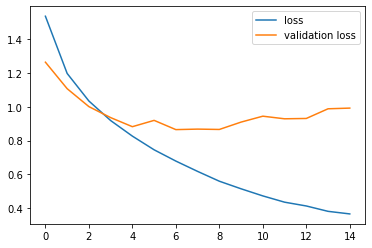

In [14]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="validation loss")
plt.legend()

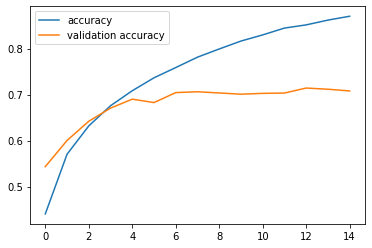

In [15]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="validation accuracy")
plt.legend()

Confusion matrix without normalization
[[705  17  58  11  26   9  13   8  99  54]
 [  5 815   6   7   4   3   8   3  17 132]
 [ 51   9 595  58 104  64  63  20  17  19]
 [ 12  14  61 462  78 211  75  41  12  34]
 [ 16   3  60  56 682  50  46  64  14   9]
 [  9   7  50 174  52 615  24  45  12  12]
 [  6   8  44  46  49  39 775   9   7  17]
 [ 18   4  32  25  60  68   6 751   4  32]
 [ 34  35  15  10  12   6   4   8 837  39]
 [ 30  60   7  12   3   8   8  13  16 843]]


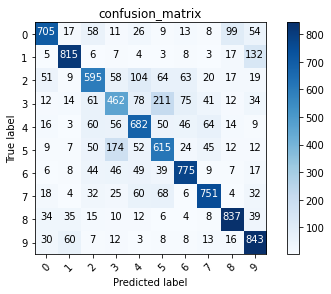

In [16]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title="confusion_matrix", cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion matrix without normalization")

    print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [22]:
labels= [
    "Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"
]

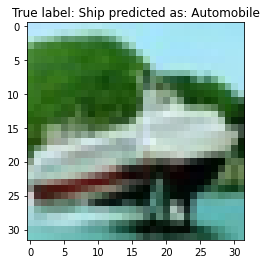

In [34]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i])
plt.title(f"True label: {labels[y_test[i]]} predicted as: {labels[p_test[i]]}");

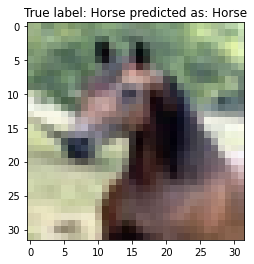

In [32]:
good_classified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(good_classified_idx)
plt.imshow(x_test[i])
plt.title(f"True label: {labels[y_test[i]]} predicted as: {labels[p_test[i]]}");